Carles Falcó i Gandia

Perm Number: 7621931
    
falcoigandia@ucsb.edu

In [280]:
# Python modules
import matplotlib.pyplot as plt
from sympy import var, expand
from numpy import linspace, exp
from pandas import DataFrame

# Divided differences are symmetric

(a) First, we know that given $((x_0,f(x_0)),\ldots,(x_n,f(x_n))$ the polyomial
$$p_n(x)=\sum_{j=0}^n l_j(x) f(x_j),\;\; l_j(x)=\frac{\prod_{i = 0,\;i\neq j}^n (x-x_i)}{\prod_{i = 0,\;i\neq j}^n (x_j-x_i)}$$ interpolates the data. On the other hand, we also can compute this interpolating polynomial using Newton's divided differences:
$$p_n(x) = p_{n-1}(x)+f[x_0,\ldots,x_n](x-x_0)\ldots(x-x_{n-1})$$ where $p_{n-1}(x)$ is the polynomial of at most degree $n-1$ that interpolates $((x_0,f(x_0)),\ldots,(x_{n-1},f(x_{n-1}))$. Considering the degree of this last polynomial we see that the leading coefficient of $p_n(x)$ is simply $f[x_0,\ldots,x_n]$. Also looking at the Lagrange form of $p_n(x)$ the leading coefficient is $$\sum_{j = 0}^n\frac{f(x_j)}{\prod_{i = 0,\;i\neq j}^n (x_j-x_i)}$$ which proves the stated.

(b) Now, we can write a permutation of $x_0,\ldots,x_n$ as $x_{\sigma(0)},\ldots,x_{\sigma(n)}$ where $\sigma\in S_n$. We'll take $S_n$ to be the group whose elements are all the bijections from $\{0,\ldots,n\}$ to itself, also called the symmetric group. Thus for any $\sigma\in S_n$:
$$f[x_{\sigma(0)},\ldots,x_{\sigma(n)}] = \sum_{j = 0}^n\frac{f(x_{\sigma(j)})}{\prod_{i = 0,\;i\neq j}^n (x_{\sigma(j)}-x_{\sigma(i)})}$$
However, since $\sigma$ is bijective we are only changing the order of the terms in the sum over $j$. Hence we must have:
$$f[x_{\sigma(0)},\ldots,x_{\sigma(n)}] = \sum_{j = 0}^n\frac{f(x_{\sigma(j)})}{\prod_{i = 0,\;i\neq j}^n (x_{\sigma(j)}-x_{\sigma(i)})}=\sum_{j = 0}^n\frac{f(x_j)}{\prod_{i = 0,\;i\neq j}^n (x_j-x_i)}=f[x_0,\ldots,x_n]$$

# Newton's divided difference
We'll write a code capable of computing $c_0 = f[x_0],\ldots,c_n = f[x_0,\ldots,x_n]$ and afterwards, evaluating the interpolating polynomial $p_n(x)$.

In [281]:
# Computing divided differences
# INPUT: x, y (data we want to interpolate)
# OUTPUT: newton_dif -> [c0,...,cn]
# Carles Falcó i Gandia
# 08/11/18
def newton_dif(x,y):
    l = []
    for w in y:
        l.append(w)
    for i in range(1,len(x)):
        for j in range(len(x) - 1, i - 1,-1): #we go backwards
            l[j] = ( l[j] - l[j-1] )/( x[j] - x[j-i] )  
    return l

# Evaluating the interpolating polynomial using
# a Horner-like scheme
# INPUT: x, y (data we want to interpolate)
# ,z (point where we want to evaluate)
# OUTPUT: p_n(z) for the given data
# Carles Falcó i Gandia
# 08/11/18
def inter_newton_poly(x,y,z):
    l = newton_dif(x,y)
    a = l[len(x)-1]
    for i in range(len(x) - 2,-1,-1):
        a = l[i] + (z-x[i])*a
    return a

In [282]:
# We'll test our code with the data given in the midterm
x_dat0 = [0,1,3]
y_dat0 = [1,3,13]
dat0 = {'$x_j$':x_dat0,'$f(x_j)$':y_dat0}
DataFrame(dat0)

,$f(x_j)$,$x_j$
0,1,0
1,3,1
2,13,3


p_2(x) =  1.0*x**2 + 1.0*x + 1


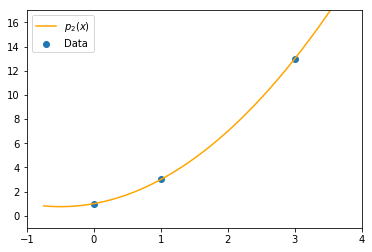

In [283]:
# We see now that we obtain the corresponding,
# interpolating polynomial
# We also plot it in order to check inter_newton_poly
x = var('x')
t = linspace(-0.75,3.75,1000)
print('p_2(x) = ',expand(inter_newton_poly(x_dat0,y_dat0,x)))
plt.scatter(x_dat0,y_dat0,label='Data')
plt.plot(t,inter_newton_poly(x_dat0,y_dat0,t), 
         color='orange',label='$p_2(x)$')
plt.xlim(-1,4)
plt.ylim(-1,17)
plt.legend(loc=2)
plt.show()
# We see that it works properly

(b) Now we can use this code for the function $f(x)=e^{-x^2}$ on $[-1,1]$ and the nodes $x_j=-1+2(j/10),\;j=0,\ldots,10$. We'll evaluate $p_{10}(x)$ at the points $\bar{x_j} = -1+2(j/100)$ for $j=0,\ldots, 100$ and we'll plot the error function $e_n(x)=f(x)-p_{10}(x)$.

In [284]:
# Evaluating p_10 at given points
# INPUT: f (function), xj (nodes), xj_ (points where evaluate)
# OUTPUT: p_10(xj_)
# Carles Falcó i Gandia
# 08/11/2018
xj = linspace(-1,1,11)
xj_ = linspace(-1,1,101)
dat1 = {'xj_':xj_,'f(xj_)':inter_newton_poly(xj,exp(-xj**2),xj_)}
#DataFrame(dat1) 
# erase # to see a table with p_10(xj_)

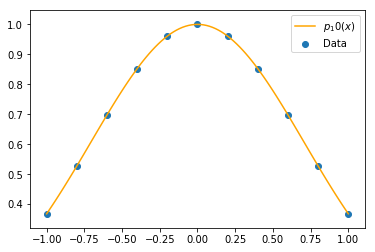

In [285]:
# Plotting p_10 at given points
# INPUT: f (function), xj (nodes), xj_ (points where evaluate)
# OUTPUT: Plot
# Carles Falcó i Gandia
# 08/11/2018
plt.scatter(xj,exp(-xj**2),label='Data')
plt.plot(xj_,inter_newton_poly(xj,exp(-xj**2),xj_)
         ,color='orange',label='$p_10(x)$')
plt.legend()
plt.show()

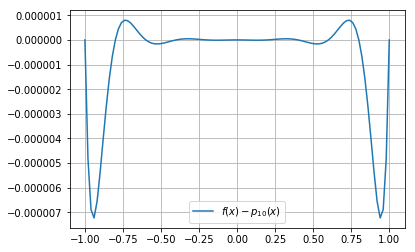

In [288]:
# Now we'll plot the error function
# INPUT: f (function), xj (nodes), xj_ (points where evaluate)
# OUTPUT: Plot
# Carles Falcó i Gandia
# 08/11/2018
plt.plot(xj_,exp(-xj_**2)-inter_newton_poly(xj,exp(-xj**2),xj_)
         ,label='$f(x)-p_{10}(x)$')
plt.grid()
plt.legend()
plt.show()

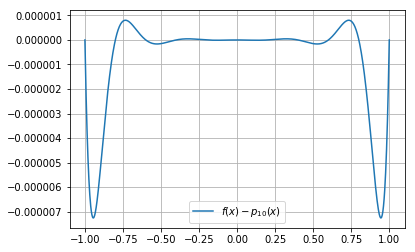

In [289]:
# Same but with better resolution
xj_bis = linspace(-1,1,1001)
plt.plot(xj_bis,exp(-xj_bis**2)-inter_newton_poly(xj,exp(-xj**2),xj_bis)
         ,label='$f(x)-p_{10}(x)$')
plt.grid()
plt.legend()
plt.show()
# cannot notice any difference

We see that although the error is rather small - we could notice it in the previous plots - it concentrates around the interval extrema and it is almost zero near $x=0$.

# Inverse interpolation
For $f(x)=x-e^{-x}$ using the values $f(0.5)=-0.10653065971263$ and $f(0.6)=0.051188363905973$ we'll find an approximation of a zero of $f$ by evaluating $\bar{x}=p_1(0)$. We know that $p_1(0) = 0.5 + \frac{0.6-0.5}{f(0.6)-f(0.5)}(0-f(0.5))=0.567544584837301$. We improve our approximation to $f(\bar{x})=0.000628840210081$.

In [278]:
# Calculations
print(0.5+(0.6-0.5)/(0.051188363905973+0.10653065971263)*0.10653065971263)
print(0.567544584837301-exp(-0.567544584837301))

0.567544584837301
0.000628840210081


Now, we could add this value to the data and make again the same argument. Using the previous code we can try to add a few values to our data to see if we can get a better approximation for a zero of $f$.

In [279]:
# Finding a better approximation to a zero of $f$
# INPUT xdat2 = [0.5,0.6], ydat2 = [f(0.5),f(0.6)]
# , tol (tolerance)
# OUPUT x_zero (approximation of zero of f)
# Carles Falcó i Gandia
# 08/11/2018
xdat2 = [0.5,0.6]; ydat2 = [-0.10653065971263 , 0.051188363905973]
tol = 1e-14
while(abs(xdat2[len(xdat2)-1]-exp(-xdat2[len(xdat2)-1])) > tol ):
    xdat2.append(inter_newton_poly(ydat2,xdat2,0))
    ydat2.append( xdat2[len(xdat2)-1]-exp(-xdat2[len(xdat2)-1]) )
dat2 = {'$x$':xdat2,'$f(x)$':ydat2}
print(xdat2)
DataFrame(dat2)

[0.5, 0.6, 0.567544584837301, 0.56714328550483162, 0.56714329040978395]


,$f(x)$,$x$
0,-1.065307e-01,0.500000
1,5.118836e-02,0.600000
2,6.288402e-04,0.567545
3,-7.686763e-09,0.567143
4,1.110223e-16,0.567143


We see then that just adding three more points we get an excellent approximation to a zero of $f$, with $f(\bar{x})\sim 10^{-16}$ and $\bar{x} = 0.56714329040978395$.

# Hermite interpolation

We'll find the Hermite interpolating polynomial given the data $f(0)=0, f'(0)=0, f(1)=2, f'(1)=3$. By building - by hand - the table of divided differences we have:
$$f[0] = 0,\; f[0,0] = 0,\; f[0,1] = \frac{2-0}{1-0} = 2,\; f[1,1] = 3$$ 
$$ f[0,0,1] = \frac{2-0}{1-0} = 2,\; f[0,1,1] = \frac{3-2}{1-0}=1$$
$$f[0,0,1,1] = \frac{1-2}{1-0} = -1$$

Hence we have that the interpolating polynomial is $p(x)= 0+0x+2x^2-x^2(x-1)=-x^3+3x^2$. We can check that indeed, interpolates the data. $p(0)=0$ and $p(1)=-1+3 = 2$. Now $p'(x)= -3x^2+6x$ and $p'(0)=0$ and $p'(1)=-3+6=3$.